In [30]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


calendarDF=pd.read_csv("sf_calendar_2018.csv.gz")

#replace NaN values with 0
calendarDF.fillna(0, inplace=True)
calendarDF = calendarDF[calendarDF.price != 0]

#finding prices
price = calendarDF['price']
prices=[]

for p in price:
    p = re.sub('[^0-9.]+','', p)
    prices.append(float(p))
    
#replace the price column with the new column
calendarDF['price']=prices

calendarDF = calendarDF[calendarDF.price >= 0]

#separating date column into day month and year
calendarDF['Year'],calendarDF['Month'],calendarDF['Day']=calendarDF['date'].str.split('-',2).str
calendarDF

,listing_id,date,available,price,Year,Month,Day
96,958,2019-08-31,t,191.0,2019,08,31
97,958,2019-08-30,t,191.0,2019,08,30
98,958,2019-08-29,t,181.0,2019,08,29
99,958,2019-08-28,t,181.0,2019,08,28
100,958,2019-08-27,t,181.0,2019,08,27
...,...,...,...,...,...,...,...
2581275,30087255,2018-12-10,t,43.0,2018,12,10
2581276,30087255,2018-12-09,t,43.0,2018,12,09
2581277,30087255,2018-12-08,t,43.0,2018,12,08
2581278,30087255,2018-12-07,t,43.0,2018,12,07


In [31]:
# average price by month YoY
yearDF=calendarDF.groupby(['Year','Month']).price.mean()
yearDF=yearDF.reset_index()
yearDF=yearDF.rename(columns={'price':'average_Price'})
yearDF['year-Month']=yearDF['Year'].map(str) + "-" + yearDF['Month'].map(str)
yearDF.to_csv('year_month_data.csv')
yearDF

,Year,Month,average_Price,year-Month
0,2018,12,235.843833,2018-12
1,2019,01,226.754231,2019-01
2,2019,02,235.360794,2019-02
3,2019,03,218.815850,2019-03
4,2019,04,214.287219,2019-04
5,2019,05,220.897307,2019-05
6,2019,06,227.576896,2019-06
7,2019,07,232.591136,2019-07
8,2019,08,232.504816,2019-08
9,2019,09,229.409688,2019-09


Text(0, 0.5, 'Average Price')

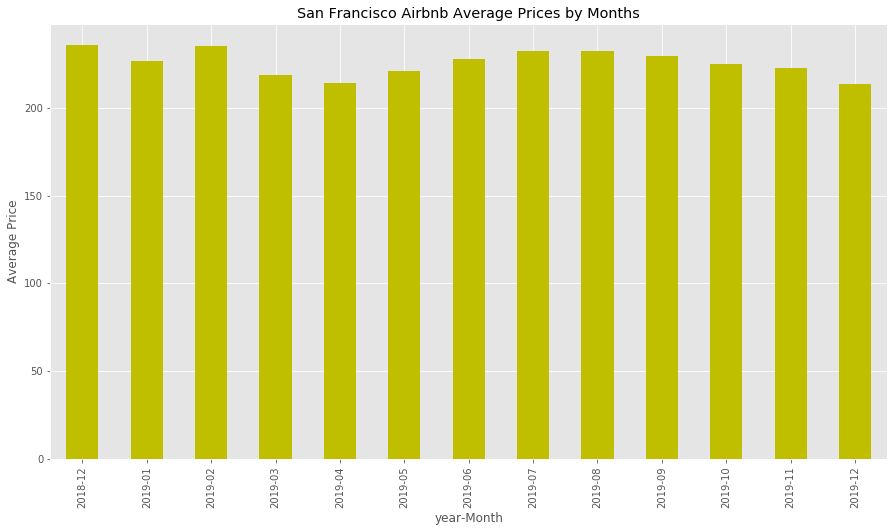

In [32]:
# year/month and average prices of the listing chart
matplotlib.style.use('ggplot')

objects = yearDF['year-Month']
y_pos = yearDF['average_Price']

yearDF.plot(kind='bar', 
           x='year-Month',
           y='average_Price',
           color = 'y', 
           figsize =(15,8), 
           title = 'San Francisco Airbnb Average Prices by Months', 
           legend = False)
plt.ylabel('Average Price')